In [1]:
############################
### import modules

import sys
import uproot
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import csv
import io
import matplotlib.colors as colors
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
import astropy
from astropy import stats

###########################

np.set_printoptions(suppress=True)
os.chdir("../data")  # moves working directory to data folder

In [2]:
def optim_bins(mult_arry):
    # optimises bin widths based on Freedman rule of thumb, takes multidimensional array
    
    width_arry = np.array([])
    
    for arry in mult_arry: 
        width_temp = astropy.stats.freedman_bin_width(arry, return_bins=False)
        width_arry = np.append(width_arry, width_temp)
    
    energy_res = np.max(width_arry)
    print(energy_res)
    flat_arry = np.concatenate(mult_arry, axis=0)
    
    return int(round((np.max(flat_arry) - np.min(flat_arry)) / energy_res, 0))

def hist_weights(rates, data):
    # returns weights of normalised histogram
    
    weights = []
    i = 0

    for event in data:
        weight = (rates[i]*np.ones_like(event))/len(event) #fraction = expected events / num of events generated
        weights.append(weight)
        i += 1
    
    return weights

def root_input(path, filename):
    # takes marsum configured MARLEY input file 
    
    rTree = uproot.open(path + filename)
    
    rTree_event = rTree['mst']
    Ex = np.array(rTree_event['Ex'])
    Ev = np.array(rTree_event['Ev'])
    KEl = np.array(rTree_event['KEl'])
    pdgp = np.array(rTree_event['pdgp'])
    Ep = np.array(rTree_event['Ep'])
    xsec = np.array(rTree_event['xsec'])
    
    return Ex, Ev, KEl, pdgp, Ep, xsec

filename = 'B8_marsum.root'
Ex, Ev, KEl, pdgp, Ep, xsec = root_input(genpath, filename)

In [3]:
def optim_bins(mult_arry):
    
    #import astropy
    #from astropy import stats
    
    width_arry = np.array([])
    
    for arry in mult_arry: 
        width_temp = astropy.stats.freedman_bin_width(arry, return_bins=False)
        width_arry = np.append(width_arry, width_temp)
    
    energy_res = np.max(width_arry)
    print(energy_res)
    flat_arry = np.concatenate(mult_arry, axis=0)
    
    return int(round((np.max(flat_arry) - np.min(flat_arry)) / energy_res, 0))

print(rTree)
print(rTree_event)
print(Ev)
print(Ex)
print(KEl)

<ReadOnlyDirectory '/' at 0x7fce435a27f0>
<TTree 'mst' (31 branches) at 0x7fcdfef2e430>
[6.67815209 8.9666489  6.34483666 ... 6.90113638 6.42183877 7.87734927]
[2.73036 4.3837  2.73036 ... 4.3837  2.28987 2.28987]
[2.44280279 3.07719327 2.10905541 ... 1.01243335 2.62720531 4.08111062]


0.041876600000000014


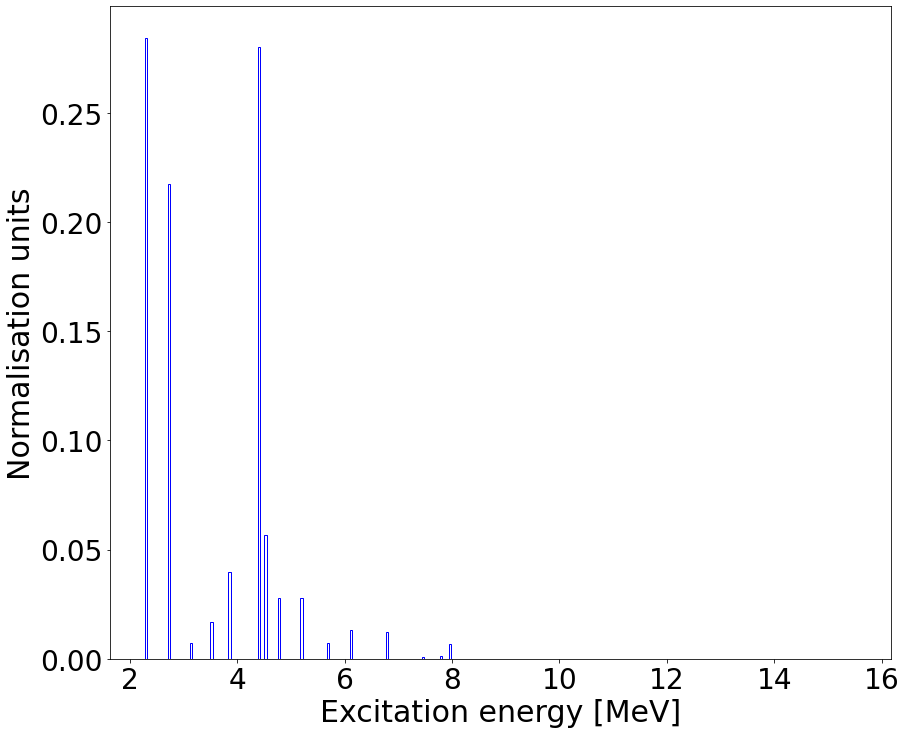

In [4]:
# spectrum of excitations

def hist_weights(rates, data):
    weights = []
    i = 0

    for event in data:
        weight = (rates[i]*np.ones_like(event))/len(event) #fraction = expected events / num of events generated
        weights.append(weight)
        i += 1
    
    return weights

plt.figure(figsize=(14,12))

data = [Ex]
rates = [1]

#num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, weights=hist_weights(rates,data), histtype='step', color='blue', bins=optim_bins(data), alpha=1)

plt.xlabel('Excitation energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

280162


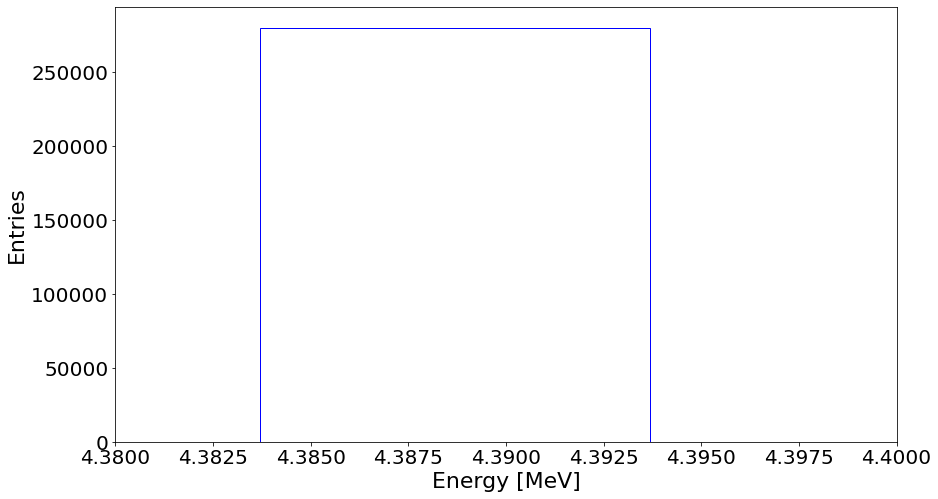

0.280162


In [5]:
# spectrum of excitations

plt.figure(figsize=(14,8))

data = [Ex[(Ex > 4)&(Ex < 4.5)]]

print(len(data[0]))

#num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', color='blue', bins=100, alpha=1)

plt.xlabel('Energy [MeV]',fontsize=22)
plt.xticks(fontsize=20)
plt.ylabel('Entries',fontsize=22)
plt.yticks(fontsize=20)
#plt.yscale('log')
plt.xlim(4.38, 4.4)

plt.show()

sen_frac = len(data[0])/len(Ex)
print(sen_frac)

0.07571834487904945


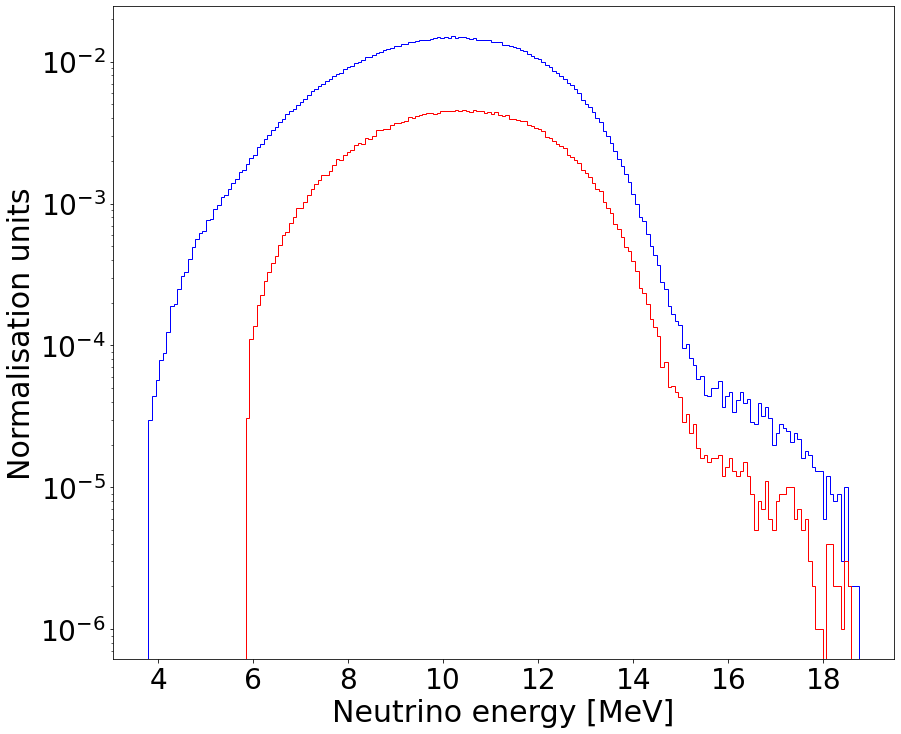

In [6]:
# spectrum of incoming neutrino

plt.figure(figsize=(14,12))

data = [Ev[(Ex > 4)&(Ex < 4.5)], Ev]
rates = [sen_frac, 1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', color=['red','blue'], weights=hist_weights(rates,data), bins=num_bins, alpha=1)

plt.xlabel('Neutrino energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
plt.yscale('log')

plt.show()

0.07571022979437124


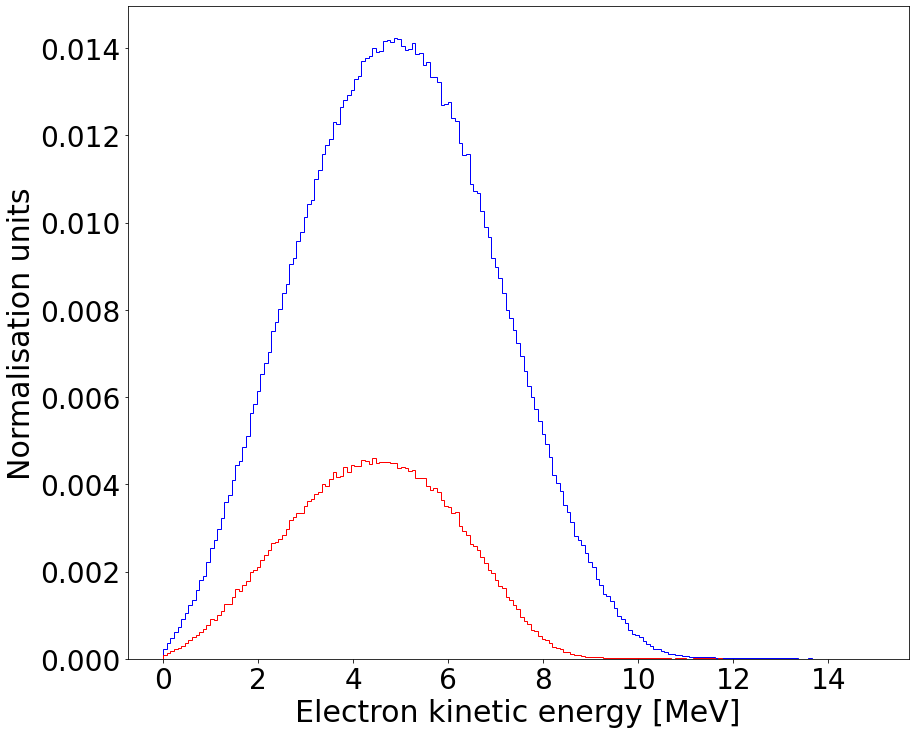

In [7]:
# spectrum of incoming neutrino

plt.figure(figsize=(14,12))

data = [KEl[(Ex > 4)&(Ex < 4.5)], KEl]
rates = [sen_frac, 1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', weights=hist_weights(rates,data), color=['red','blue'], bins=num_bins, alpha=1)

plt.xlabel('Electron kinetic energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

0.07571022979437124
168


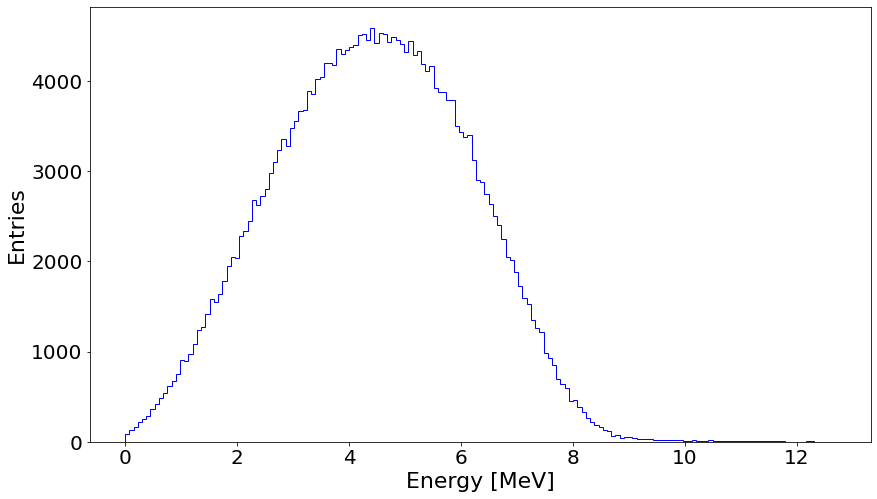

In [8]:
# kinetic energy spectrum of ejectile electron

plt.figure(figsize=(14,8))

data = [KEl[(Ex > 4)&(Ex < 4.5)]]

num_bins = optim_bins(data)
print(num_bins)
n, bins, patches = plt.hist(data, histtype='step', color='blue', bins=num_bins, alpha=1)

plt.xlabel('Energy [MeV]',fontsize=22)
plt.xticks(fontsize=20)
plt.ylabel('Entries',fontsize=22)
plt.yticks(fontsize=20)
#plt.yscale('log')

plt.show()

In [9]:
data = KEl[(Ex > 4)&(Ex < 4.5)]
output = np.histogram(data, bins=68)

print('Input these in to MARLEY config files, under neutrino source spec as type histogram...')
print('E_bin_lefts:', (output[1][0:len(output[0])]))
print('weights:', (output[0]))
print('Emax:', output[1][len(output[0])])

Input these in to MARLEY config files, under neutrino source spec as type histogram...
E_bin_lefts: [6.53432686e-04 1.87208695e-01 3.73763958e-01 5.60319220e-01
 7.46874483e-01 9.33429746e-01 1.11998501e+00 1.30654027e+00
 1.49309553e+00 1.67965080e+00 1.86620606e+00 2.05276132e+00
 2.23931658e+00 2.42587185e+00 2.61242711e+00 2.79898237e+00
 2.98553763e+00 3.17209290e+00 3.35864816e+00 3.54520342e+00
 3.73175868e+00 3.91831395e+00 4.10486921e+00 4.29142447e+00
 4.47797973e+00 4.66453500e+00 4.85109026e+00 5.03764552e+00
 5.22420079e+00 5.41075605e+00 5.59731131e+00 5.78386657e+00
 5.97042184e+00 6.15697710e+00 6.34353236e+00 6.53008762e+00
 6.71664289e+00 6.90319815e+00 7.08975341e+00 7.27630867e+00
 7.46286394e+00 7.64941920e+00 7.83597446e+00 8.02252972e+00
 8.20908499e+00 8.39564025e+00 8.58219551e+00 8.76875077e+00
 8.95530604e+00 9.14186130e+00 9.32841656e+00 9.51497182e+00
 9.70152709e+00 9.88808235e+00 1.00746376e+01 1.02611929e+01
 1.04477481e+01 1.06343034e+01 1.08208587e+01 

In [10]:
with open('8BCC_elecKE.txt', 'w') as f:
    
    for i in np.arange(0, len(output[0])):
        f.write("{} {}\n".format(output[1][i], output[0][i])) 
        #f.write(output[1][i] + ' ' + output[0][i])

In [11]:
print(pdgp)
print(np.concatenate(Ep))

[array([22, 22, 22], dtype=int32) array([22, 22, 22], dtype=int32)
 array([22, 22, 22], dtype=int32) ... array([22, 22, 22], dtype=int32)
 array([22, 22, 22], dtype=int32) array([22, 22, 22, 22], dtype=int32)]
[1.08655334 1.61403711 0.02982929 ... 0.84331017 0.77013879 0.02982706]


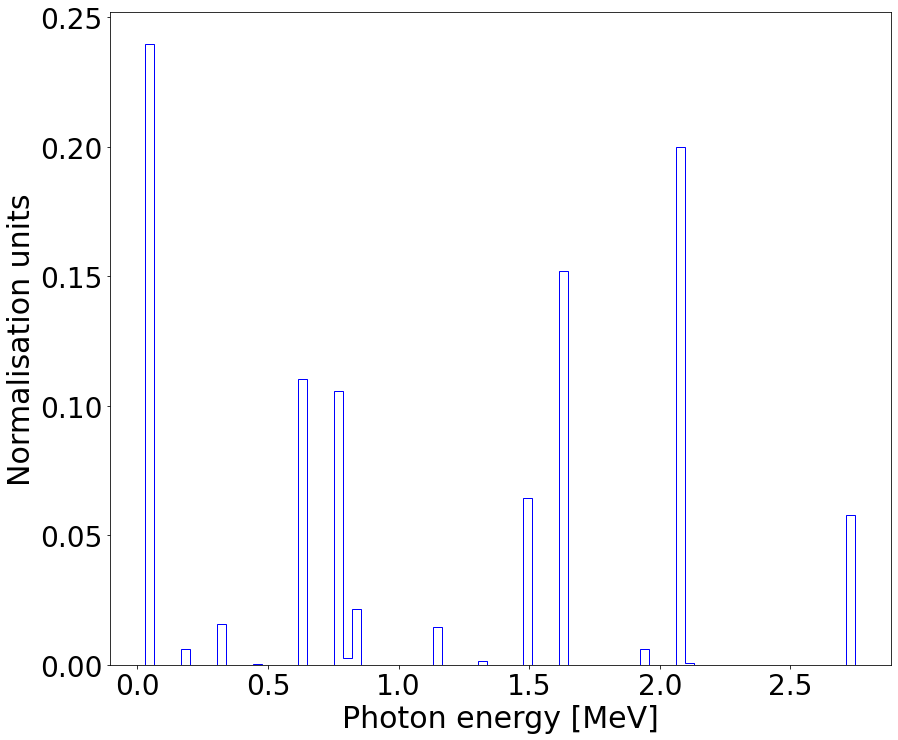

In [12]:
plt.figure(figsize=(14,12))

data = np.array(np.concatenate(Ep[(Ex > 4)&(Ex < 4.5)]))

num_bins = int((np.max(data) - np.min(data))/astropy.stats.freedman_bin_width(data, return_bins=False))

rate = 1
weight = (rate*np.ones_like(data))/len(data)

n, bins, patches = plt.hist(data, histtype='step', color='blue', weights=weight, bins=num_bins, alpha=1)

plt.xlabel('Photon energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

In [13]:
data = np.concatenate([Ep[(Ex > 4)&(Ex < 4.5)]])

output = np.array([])
len_array = np.array([])
for array in data:
    output = np.append(output, np.mean(array))
    len_array = np.append(len_array, len(array))

print(output)
print(np.mean(output))
print(np.mean(len_array))


[1.46142263 1.09612667 0.87677568 ... 1.09582774 1.0957756  1.46117809]
1.2007534137685167
3.848173556727893


8.403279453266955e-06
100


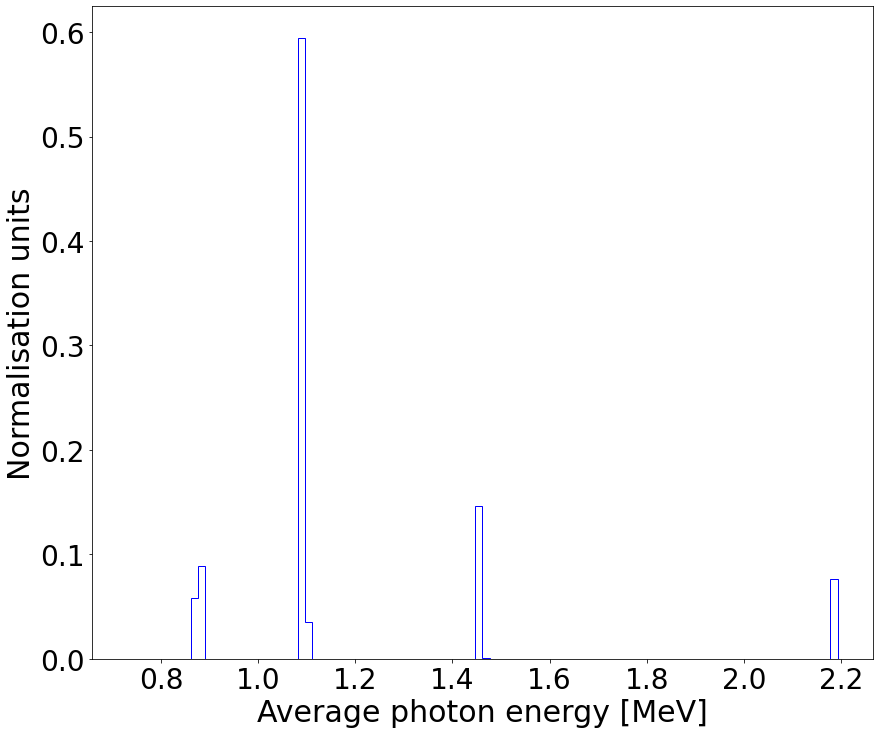

In [14]:
plt.figure(figsize=(14,12))

data = output
print(astropy.stats.freedman_bin_width(data, return_bins=False))

num_bins = 100 #int((np.max(data) - np.min(data))/astropy.stats.freedman_bin_width(data, return_bins=False))
print(num_bins)

rate = 1
weight = (rate*np.ones_like(data))/len(data)

n, bins, patches = plt.hist(data, histtype='step', color='blue', weights=weight, bins=num_bins, alpha=1)

plt.xlabel('Average photon energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

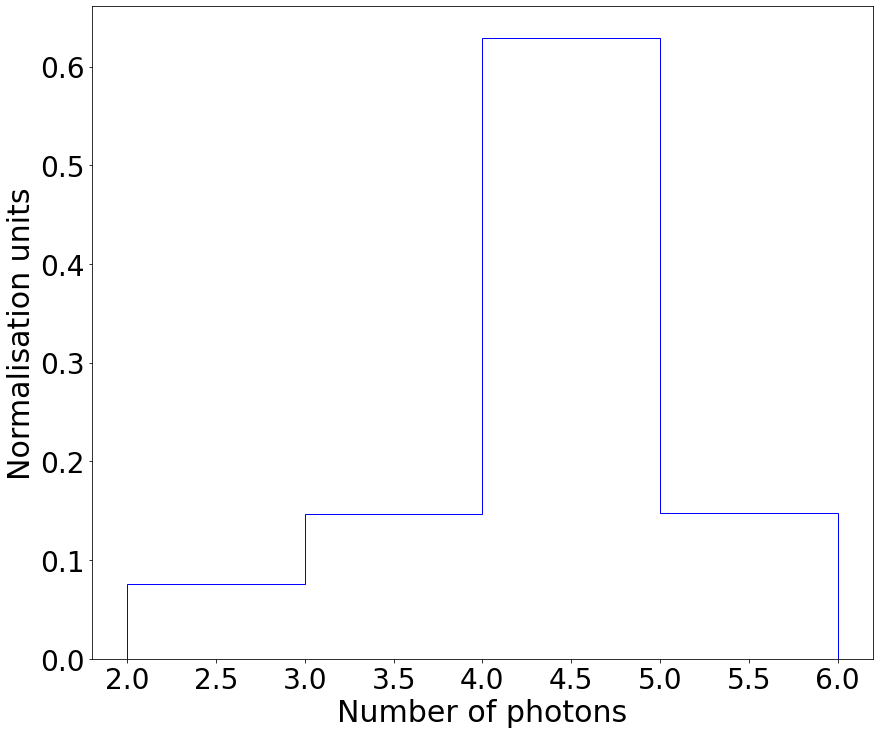

In [15]:
plt.figure(figsize=(14,12))

data = len_array

#num_bins = int((np.max(data) - np.min(data))/astropy.stats.freedman_bin_width(data, return_bins=False))

rate = 1
weight = (rate*np.ones_like(data))/len(data)

n, bins, patches = plt.hist(data, histtype='step', color='blue', weights=weight, bins=int(4/1), alpha=1, range=[2,6])

plt.xlabel('Number of photons',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

[array([1.08655334, 1.61403711, 0.02982929])
 array([1.63692356, 2.71750975, 0.02983458])
 array([1.08664498, 1.61391727, 0.02983598]) ...
 array([1.63678391, 2.71692128, 0.02982908])
 array([1.48986066, 0.77025742, 0.02983282])
 array([0.64613748, 0.84331017, 0.77013879, 0.02982706])]
[array([22, 22, 22], dtype=int32) array([22, 22, 22], dtype=int32)
 array([22, 22, 22], dtype=int32) ... array([22, 22, 22], dtype=int32)
 array([22, 22, 22], dtype=int32) array([22, 22, 22, 22], dtype=int32)]
393661
599383
0.06302517649353813


<Figure size 1008x864 with 0 Axes>

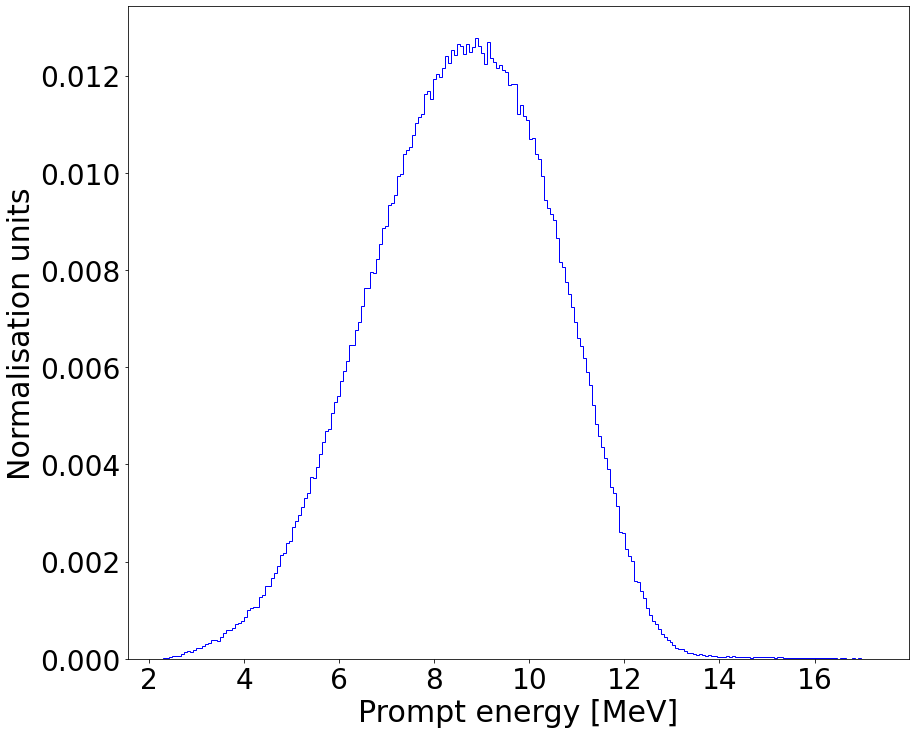

In [27]:
plt.figure(figsize=(14,12))

data = np.concatenate([Ep])
print(data)
print(pdgp)

#if any(mintrshold < x <= maxtreshold for x in a): print('True') 

#goodItems = data
#goodItems[(a<1.616) & (a>1.6)] 

#if goodItems.any(): 
#   print("there s an item within range")

output = np.array([])
len_array = np.array([])
output2 = np.array([])
KEl_output = np.array([])
Ev_output = np.array([])
Ev_output2 = np.array([])
prompt_output = np.array([])
prompt_output2 = np.array([])
i = 0
for array in data:
    if any(1.6 < x < 1.616 for x in array):
        if any(x > 22 for x in pdgp[i]):
            pass
        else:
            KEl_output = np.append(KEl_output, KEl[i])
            Ev_output = np.append(Ev_output, Ev[i])
            prompt_output = np.append(prompt_output, KEl[i] + (np.sum(array)-1.614-0.03))
            #output2 = np.append(output2, element)
            #output = np.append(output, np.sum(array)-element)
            len_array = np.append(len_array, len(array))
    else:
        if any(x > 22 for x in pdgp[i]):
            pass
        else:
            prompt_output2 = np.append(prompt_output2, KEl[i] + (np.sum(array)))
            Ev_output2 = np.append(Ev_output2, Ev[i])
    i += 1

print(len(prompt_output))
print(len(prompt_output2))


plt.figure(figsize=(14,12))

data = [prompt_output2]
rates = [1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', weights=hist_weights(rates,data), color=['blue'], bins=num_bins, alpha=1)

plt.xlabel('Prompt energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

[ 6.67815209  6.34483666 10.30492303 ...  8.01753095  9.29512117
  8.73043353]
[6.67815209 8.9666489  6.34483666 ... 6.90113638 6.42183877 7.87734927]
196


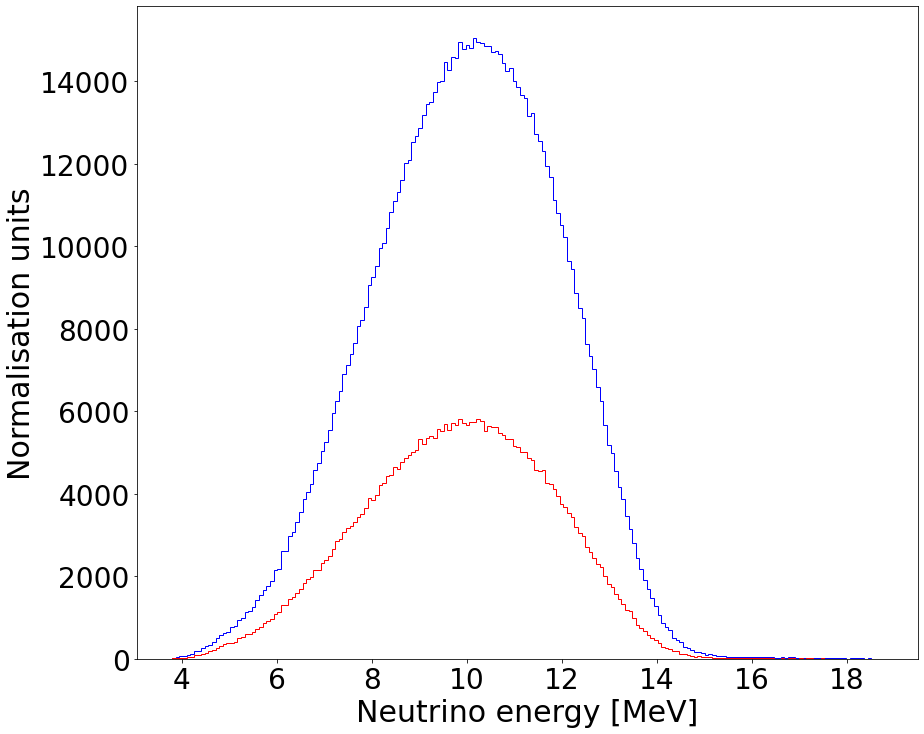

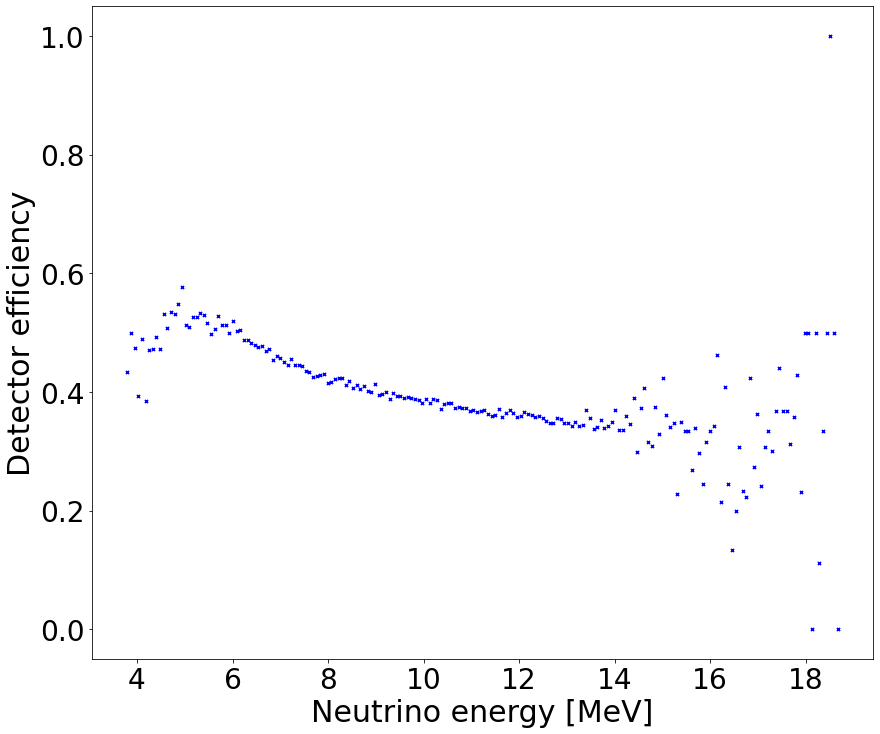

In [40]:

plt.figure(figsize=(14,12))

sen_frac = 0.393661

print(Ev_output)
print(Ev)

data = [Ev_output, Ev]
rates = [sen_frac, 1]

num_bins = 196 #optim_bins(data)
print(num_bins)
n, bins, patches = plt.hist(data, histtype='step', color=['red','blue'], bins=num_bins, alpha=1)

plt.xlabel('Neutrino energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()


plt.figure(figsize=(14,12))

eff = n[0]/n[1]
x = bins[0:len(eff)]

plt.scatter(x, eff, marker='x', s=10, color='blue')
#plt.errorbar(x, eff, yerr=uncer, ls='none', color='blue')

#popt, pcov = curve_fit(sigmoid, x[~np.isnan(eff)], eff[~np.isnan(eff)])
#plt.plot(x[~np.isnan(eff)], sigmoid(x[~np.isnan(eff)], *popt))

#plt.yscale('log')
plt.xlabel('Neutrino energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Detector efficiency',fontsize=30)
plt.yticks(fontsize=28)
#plt.ylim(0,1)
#plt.title("SNOwGLoBES", fontsize=20)

#plt.legend(fontsize=28)

plt.show()

0.07855319744123686


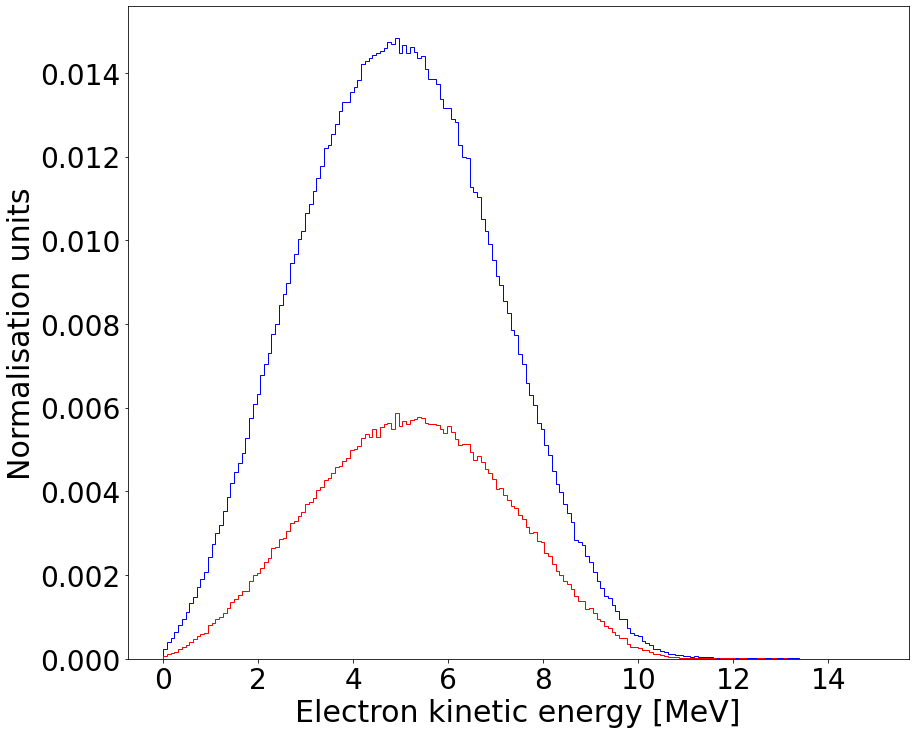

In [29]:


################################

plt.figure(figsize=(14,12))

data = [KEl_output, KEl]
rates = [sen_frac, 1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', weights=hist_weights(rates,data), color=['red','blue'], bins=num_bins, alpha=1)

plt.xlabel('Electron kinetic energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

0.07622938545685674


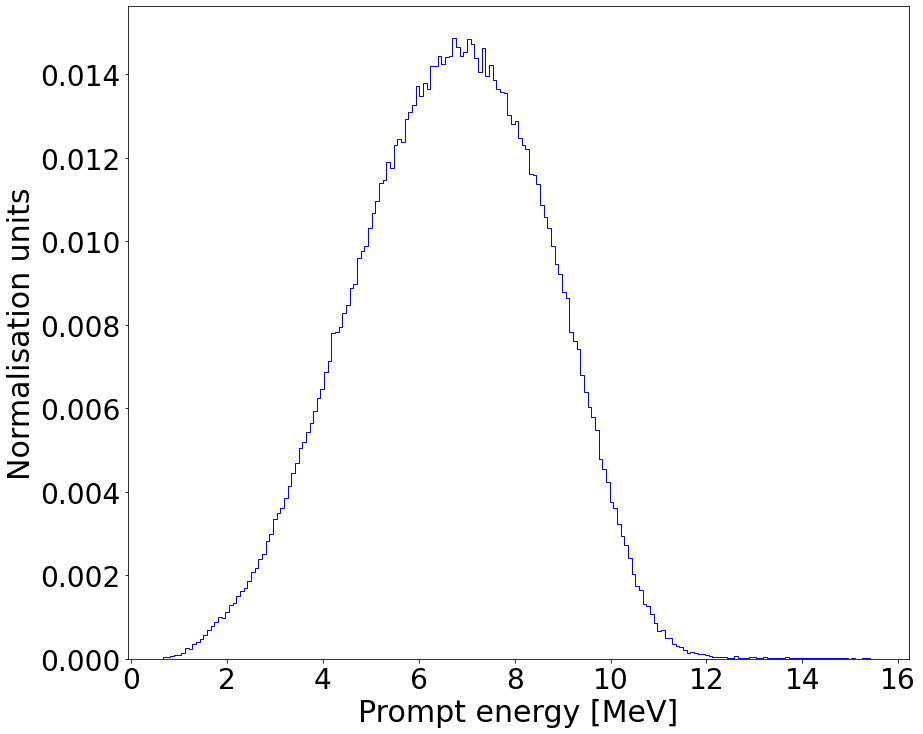

In [18]:
plt.figure(figsize=(14,12))

data = [prompt_output]
rates = [1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', weights=hist_weights(rates,data), color=['blue'], bins=num_bins, alpha=1)

plt.xlabel('Prompt energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()


0.06302517649353813


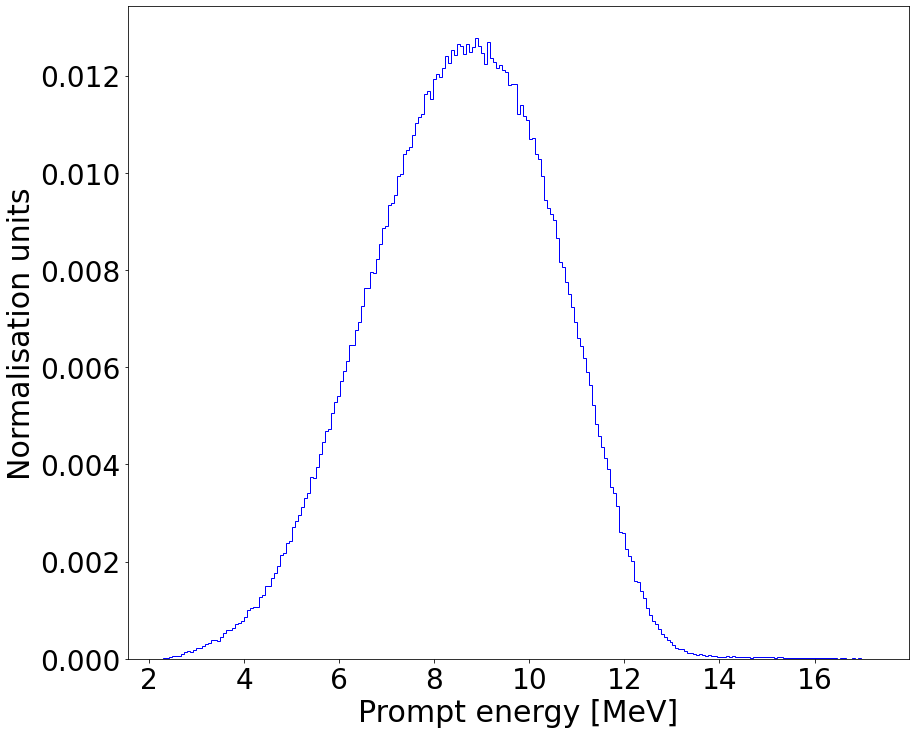

In [19]:
plt.figure(figsize=(14,12))

data = [prompt_output2]
rates = [1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', weights=hist_weights(rates,data), color=['blue'], bins=num_bins, alpha=1)

plt.xlabel('Prompt energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

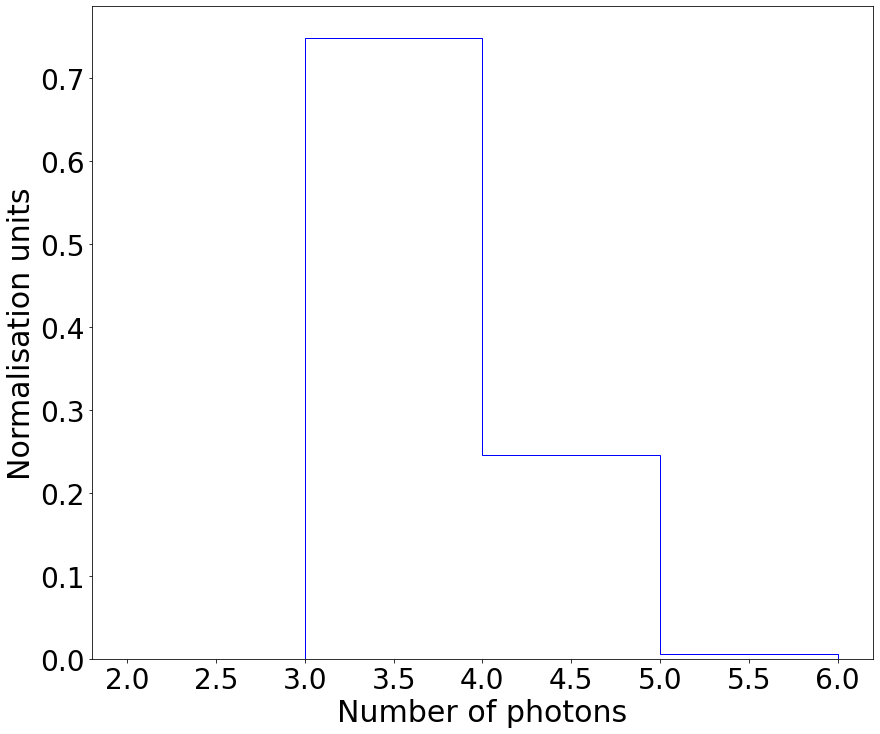

In [20]:
plt.figure(figsize=(14,12))

data = len_array

#num_bins = int((np.max(data) - np.min(data))/astropy.stats.freedman_bin_width(data, return_bins=False))

rate = 1
weight = (rate*np.ones_like(data))/len(data)

n, bins, patches = plt.hist(data, histtype='step', color='blue', weights=weight, bins=int(4/1), alpha=1, range=[2,6])

plt.xlabel('Number of photons',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

0.006956


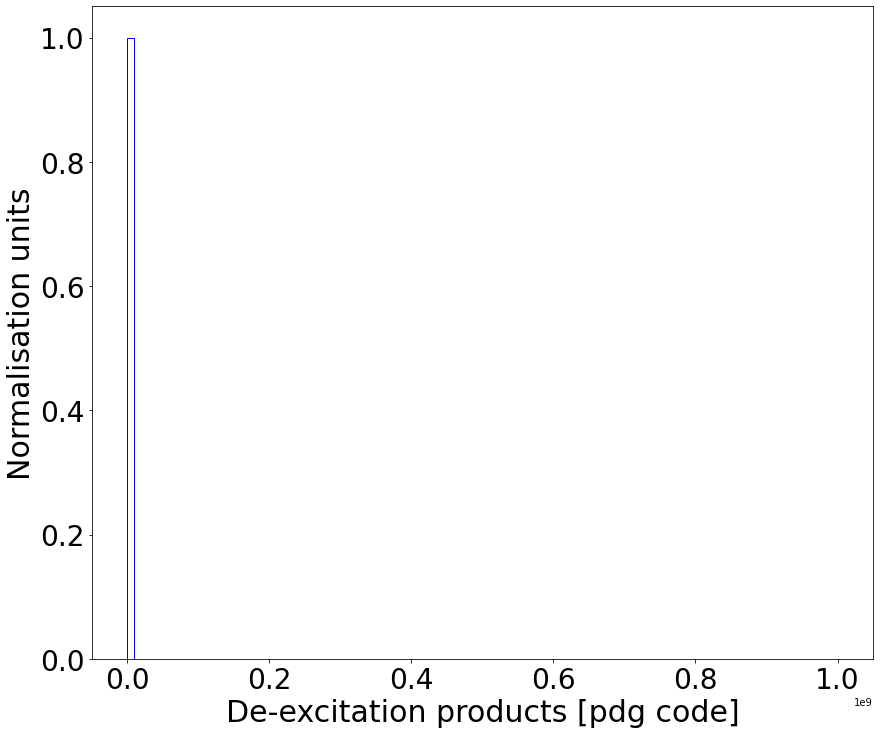

In [21]:
plt.figure(figsize=(14,12))


output = np.array([])
len_array = np.array([])
output2 = np.array([])
KEl_output = np.array([])
Ev_output = np.array([])
prompt_output = np.array([])
i = 0

data = pdgp

for array in data:
    for element in array: 
        if element > 22: 
            i += 1
print(i/len(data))
    
data = np.concatenate(pdgp)
rates = [1]

num_bins = 100
weight = (rate*np.ones_like(data))/len(data)

n, bins, patches = plt.hist(data, histtype='step', weights=weight, color=['blue'], bins=num_bins, alpha=1)

plt.xlabel('De-excitation products [pdg code]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

Pearsons correlation: 1.000


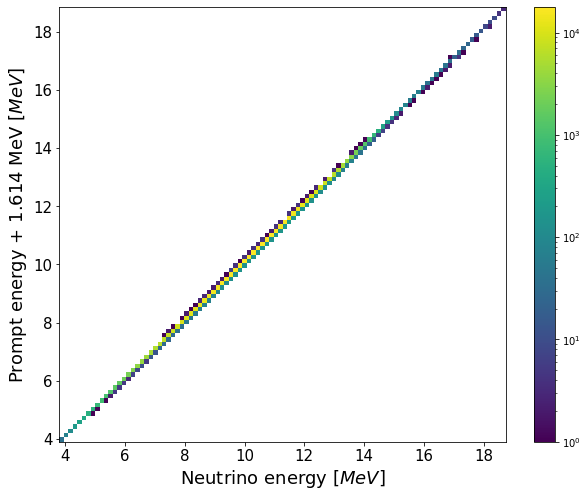

In [22]:
plt.figure(figsize=(10,8))
xdata = Ev_output2
ydata = prompt_output2 

fig = plt.hist2d(xdata, ydata+1.614, bins=(100, 100), norm=colors.LogNorm())

colourbar = plt.colorbar()
#colourbar.set_label("Entries")

plt.xlabel('Neutrino energy [$MeV$]',fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Prompt energy + 1.614 MeV [$MeV$]',fontsize=18)
plt.yticks(fontsize=15)
#plt.xlim([0, 20])
#plt.ylim([0, 40])

corr, _ = pearsonr(xdata, ydata)
print('Pearsons correlation: %.3f' % corr)

#plt.text(2.1, 19, 'No foils and no Xe', fontsize=15,  color='black')
#plt.text(2.1, 18.2, 'Pearson corelation: 0.739', fontsize=15,  color='black')

plt.show()